<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/logo_CV.jpeg" style="width:1500px;heigth:100px">

# Computing deep features from pre-trained models

## <span style="color:red"> Outline </span> 
1. **Deep Features from Pre-trained Models**
2. **Compute deep features from higher level layers**
3. **Computing dense features from low level layers**

In [1]:
import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage import io
import os
import sys

## <span style="color:green"> If you are in colaboratoy </span>: 

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/My Drive/cv-uis-student/notebooks
!pwd

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive
/content/drive/My Drive/cv-uis-student/notebooks
/content/drive/My Drive/cv-uis-student/notebooks


## <span style="color:red"> 1. Deep Features from Pre-trained Models </span> 

A deep feature is the **response of a node or layer** within a hierarchical deep architecture. 

- An example of **Deep features** are the Learned filters (features), such as image edge and contour detectors from earlier layers.

- In first layers, the filters are very general and can be used in other contexts
- In middle of architectures, we can explore regional patterns and easily characterize objects by its texture of shape variations. 
- In deeper layers, filters are more specialized  and describe "more complex patterns", related with the set of training labels. 

<img width="700px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/DF_1.png">

**Go to the action!**
 - Load almost two CNN-models. 

In [3]:
model_ResNet50 = tf.keras.applications.ResNet50(weights='imagenet')
model_ResNet50.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
102973440/102967424 [==============================] - 3s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112

## <span style="color:red"> 2. Compute deep features from higher level layers </span> 


<img width="1000px" src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/DF_2.png">

We can take advantage of previously trained deep architecture. If the concepts and object labels are related, then we can use superior `fully connected layers` as descriptors. Then, we can use a *classical* machine learning strategy to deal with classification. 

- For Resnet the input size is (224x224)
- For Inception the input size is (299x299)

Then, we can obtain fully descriptor for a specific image, as

In [0]:
model_fc_Resnet = tf.keras.models.Model(inputs=model_ResNet50.input, 
                        outputs=model_ResNet50.get_layer('avg_pool').output)

In [9]:
filename = '../data/image_set/elephant/image_0004.jpg'
im_ele = tf.contrib.keras.preprocessing.image.load_img(filename, target_size=(224, 224))
print ( type(im_ele))
ima_elep = tf.contrib.keras.preprocessing.image.img_to_array(im_ele)
ima_elep = np.expand_dims(ima_elep, axis=0);

<class 'PIL.Image.Image'>


2048


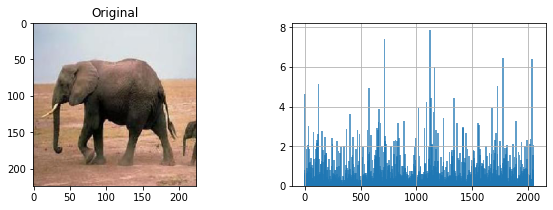

In [10]:
features = model_fc_Resnet.predict(ima_elep)
print( features.shape[1])
features = features.reshape(features.shape[1])

plt.figure(figsize=(10,3))
plt.subplot(121), plt.imshow(im_ele,'gray'), plt.title('Original'); 
plt.subplot(122), plt.bar(range(int(features.shape[0])), features,alpha=0.7, width=15), 
plt.grid(True);

In [0]:
im_ele2 = tf.contrib.keras.preprocessing.image.load_img(
    '../data/image_set/elephant/image_0010.jpg', target_size=(224, 224))
ima_elep2 = tf.contrib.keras.preprocessing.image.img_to_array(im_ele2)
ima_elep2 = np.expand_dims(ima_elep2, axis=0);

im_tr1 = tf.contrib.keras.preprocessing.image.load_img(
    '../data/image_set/cougar_body/image_0007.jpg', target_size=(224, 224))
ima_trp1 = tf.contrib.keras.preprocessing.image.img_to_array(im_tr1)
ima_trp1 = np.expand_dims(ima_trp1, axis=0);

im_tr2 = tf.contrib.keras.preprocessing.image.load_img(
    '../data/image_set/cougar_body/image_0010.jpg', target_size=(224, 224))
ima_trp2 = tf.contrib.keras.preprocessing.image.img_to_array(im_tr2)
ima_trp2 = np.expand_dims(ima_trp2, axis=0);

features_el1 = model_fc_Resnet.predict(ima_elep2)
features_tr1 = model_fc_Resnet.predict(ima_trp1)
features_tr2 = model_fc_Resnet.predict(ima_trp2)

features_el1 = features_el1.reshape(features_el1.shape[1])
features_tr1 = features_tr1.reshape(features_tr1.shape[1])
features_tr2 = features_tr2.reshape(features_tr2.shape[1])

(<matplotlib.axes._subplots.AxesSubplot at 0x7f446817ba20>,
 <BarContainer object of 2048 artists>)

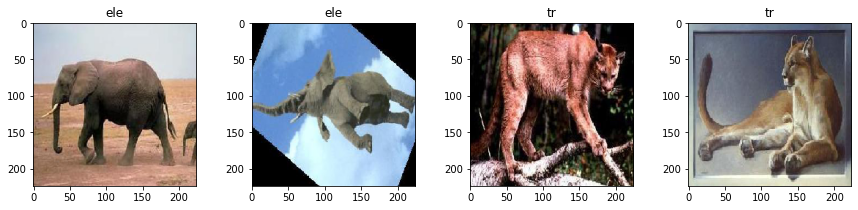

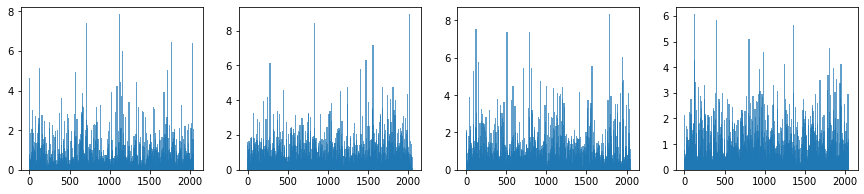

In [12]:
plt.figure(figsize=(15,3))
plt.subplot(141), plt.imshow(im_ele,'gray'), plt.title('ele');
plt.subplot(142), plt.imshow(im_ele2,'gray'), plt.title('ele');
plt.subplot(143), plt.imshow(im_tr1,'gray'), plt.title('tr');
plt.subplot(144), plt.imshow(im_tr2,'gray'), plt.title('tr');
plt.figure(figsize=(15,3))
plt.subplot(141), plt.bar(range(int(features.shape[0])), features,alpha=0.7, width=15), 
plt.subplot(142), plt.bar(range(int(features_el1.shape[0])), features_el1,alpha=0.7, width=15), 
plt.subplot(143), plt.bar(range(int(features_tr1.shape[0])), features_tr1,alpha=0.7, width=15), 
plt.subplot(144), plt.bar(range(int(features_tr2.shape[0])), features_tr2,alpha=0.7, width=15), 


## <span style="color:orange">Student Challenge</span>: 

- Take the image dataset, that is a reduced dataset from **Imagenet**
- Map each image of the dataset to the fully connected layer. 

In [13]:
path_classes = '../data/image_set/'
classes_names = os.listdir(path_classes)
print( classes_names[0:5])
classes_names = classes_names[0:5]

list_imgs = []
for i, name_class in enumerate(classes_names):
    list_imgs = list_imgs +[name_class+ "/"+ s for s in (os.listdir(path_classes + classes_names[i]))]
print( len(list_imgs))
array_imgs = np.array(list_imgs)
print( array_imgs[0], array_imgs.shape)

['accordion', 'brain', 'butterfly', 'car_side', 'chair']
429
accordion/image_0012.jpg (429,)


we go to take the 80% for training ...

In [14]:
perm = np.random.permutation(len(list_imgs))
perm_arr_images = array_imgs[perm]

val_train = int(perm_arr_images.shape[0]*0.8)
array_imgs_train = perm_arr_images[0:val_train]
array_imgs_test  = perm_arr_images[val_train:]


print( array_imgs_train.shape, array_imgs_test.shape)
print( array_imgs_train.shape[0]+ array_imgs_test.shape[0])
print( array_imgs_test[0])

(343,) (86,)
429
car_side/image_0007.jpg


In [15]:
print( classes_names)
dic_classes = {}
for index, name in enumerate(classes_names):
    dic_classes[name] = index+1 

['accordion', 'brain', 'butterfly', 'car_side', 'chair']


(2048,)
(71, 2048) (280, 2048) (280,) (71,)



- Use "standard" classifiers to obtain a class prediction: SVM+linear, SVM+RBF, RF, 
- Use a DNN that receive as input the `FCL` and classify the images 


acc RF 0.943661971831
acc SVM  0.985915492958


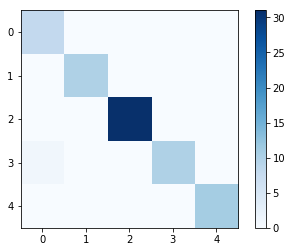

In [0]:
plt.imshow(cm_RF, interpolation="nearest", cmap=plt.cm.Blues), plt.colorbar();


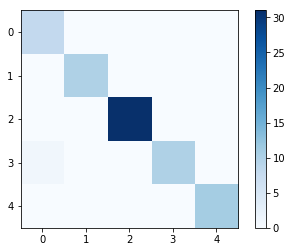

In [0]:
plt.imshow(cm_SVM, interpolation="nearest", cmap=plt.cm.Blues),  plt.colorbar();

- A common scheme in literature, nowadays, it is to combine fully connection layers from different architectures. 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 2048)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 512)               1049088   
_________________________________________________________________
dense_8 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_9 (Dense)              (None, 6)                 1542      
Total params: 1,181,958
Trainable params: 1,181,958
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.fit(arr_h_train, y_tr_, batch_size=64, epochs=15, verbose=1)

Epoch 1/15
280/280 [==============================] - 0s - loss: 1.0498 - acc: 0.6179     
Epoch 2/15
280/280 [==============================] - 0s - loss: 0.0705 - acc: 0.9750     
Epoch 3/15
280/280 [==============================] - 0s - loss: 0.0355 - acc: 0.9893     
Epoch 4/15
280/280 [==============================] - 0s - loss: 0.0063 - acc: 1.0000     
Epoch 5/15
280/280 [==============================] - 0s - loss: 0.0211 - acc: 0.9964     
Epoch 6/15
280/280 [==============================] - 0s - loss: 0.0021 - acc: 1.0000        
Epoch 7/15
280/280 [==============================] - 0s - loss: 6.2577e-04 - acc: 1.0000     
Epoch 8/15
280/280 [==============================] - 0s - loss: 2.8949e-04 - acc: 1.0000     
Epoch 9/15
280/280 [==============================] - 0s - loss: 4.8389e-04 - acc: 1.0000     
Epoch 10/15
280/280 [==============================] - 0s - loss: 2.6798e-04 - acc: 1.0000     
Epoch 11/15
280/280 [==============================] - 0s - loss: 9.59

('Test accuracy:', 0.9859154929577465)


- Try a classification using the Inceptionv3 architecture
    `model_Inception = tf.keras.applications.inception_v3.InceptionV3(weights='imagenet')`


## <span style="color:red"> 3. Computing dense features from low level layers </span> 

If the objects and classes are very different from the set of learned images, we can use the first layers. In general, the images are into a same representation space, that could be so general to represent any concept. 

So, we can get responses of first layers and compute a visual descriptor. It should be notted that raw descriptor (with all filter responses) could be prohibitive large. So we can compact information from a PCA or an other reduction methdo. 


In [0]:
model_firstL_Resnet = tf.keras.models.Model(inputs=model_ResNet50.input, 
                        outputs=model_ResNet50.get_layer('pool1_pool').output)

In [0]:
features_FL = model_firstL_Resnet.predict(ima_elep)
print( features_FL.shape)


(1, 56, 56, 64)


(56, 56)


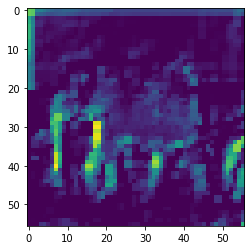

In [0]:
test =features_FL[0,:,:, 52]
print( test.shape)
plt.imshow(test);

## <span style="color:orange">Student Challenge</span>: 

- Try the problem by computing and concatenating all filter responses. 

In [0]:
sklearn

pca = PCA(ncomponents=200)
    = pca.fit(X_train)

x_train_pca =  pca.transform(X_train)
x_test_pca = pca.transform(Y_train)





- Apply the PCA reduction before compute the classifier

### <span style="color:red"> What about intermediate layers.... to be continued  </span> 

# References

- https://neurohive.io/en/popular-networks/vgg16/

- https://medium.com/tensorflow/training-and-serving-ml-models-with-tf-keras-fd975cc0fa27

- https://keras.io/applications/

- https://planspace.org/20170502-canned_models_with_keras_in_tensorflow/


<img src="https://gitlab.com/bivl2ab/academico/cursos-uis/cv/cv-uis-student/raw/master/imgs/bannerThanks.jpg" style="width:1000px;">